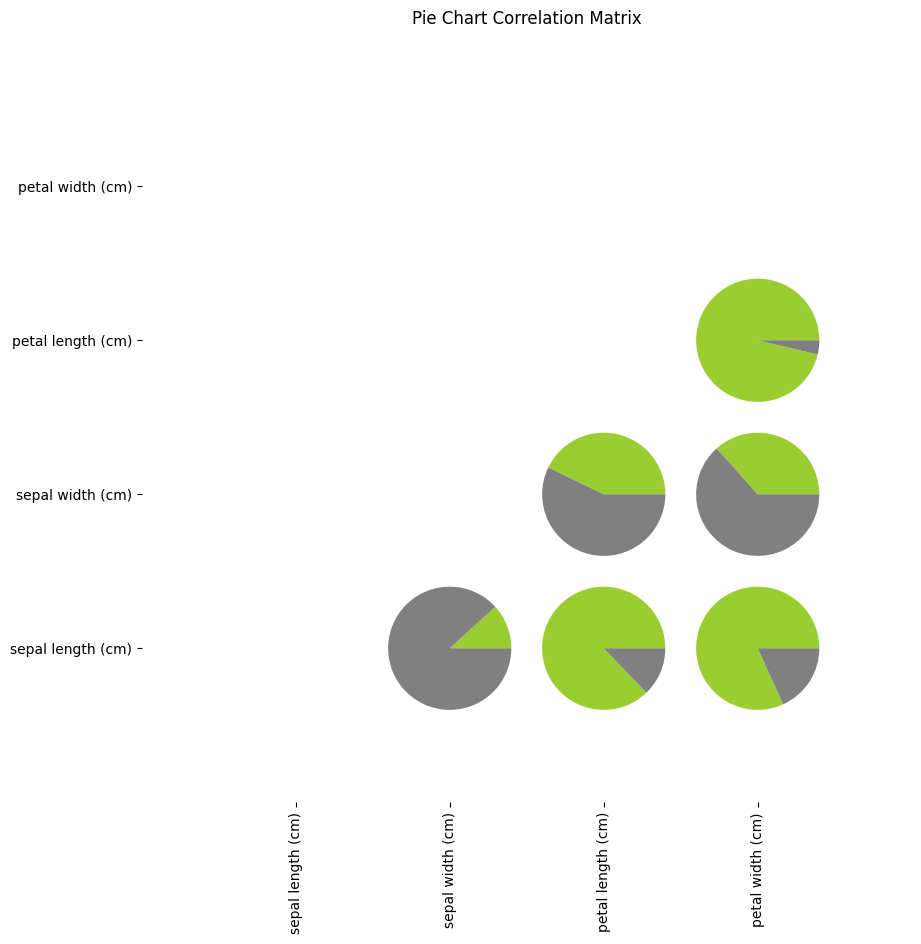

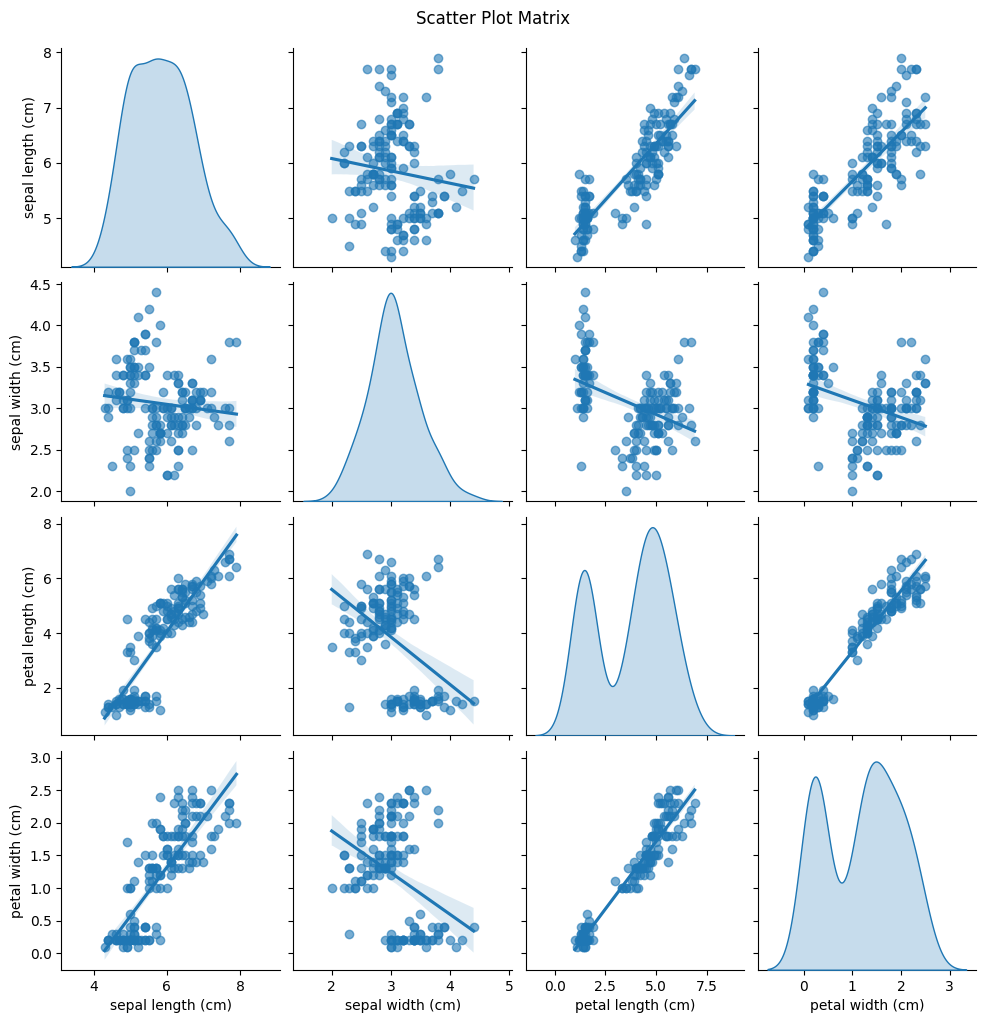

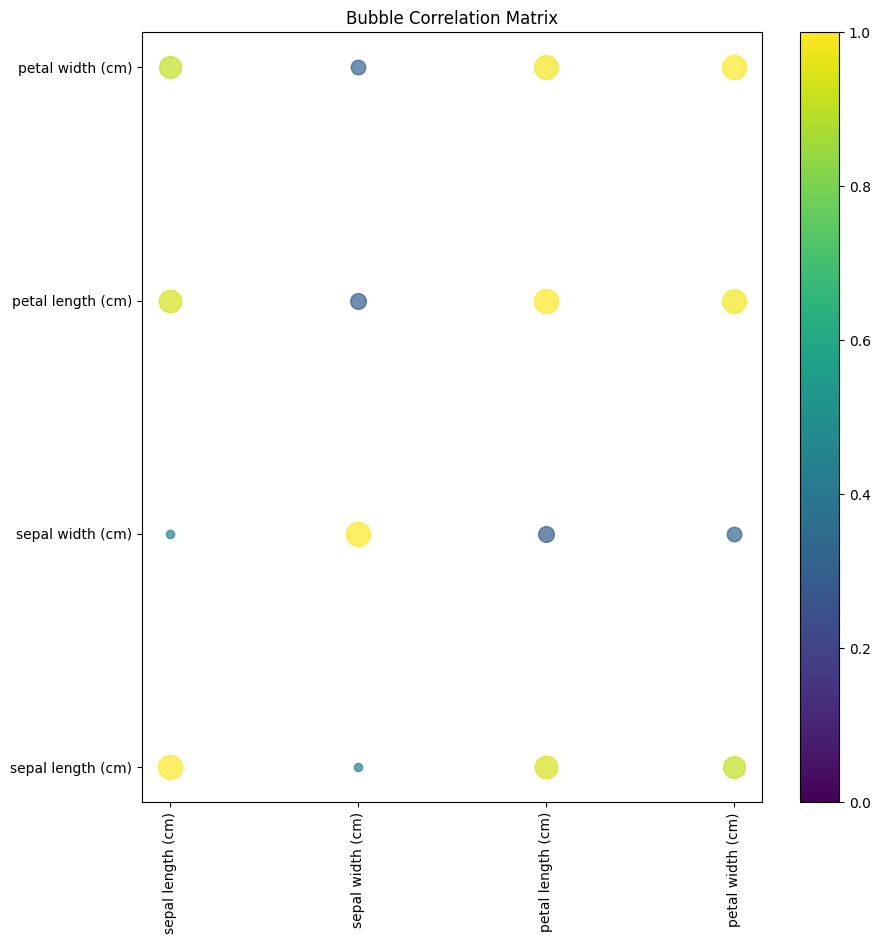

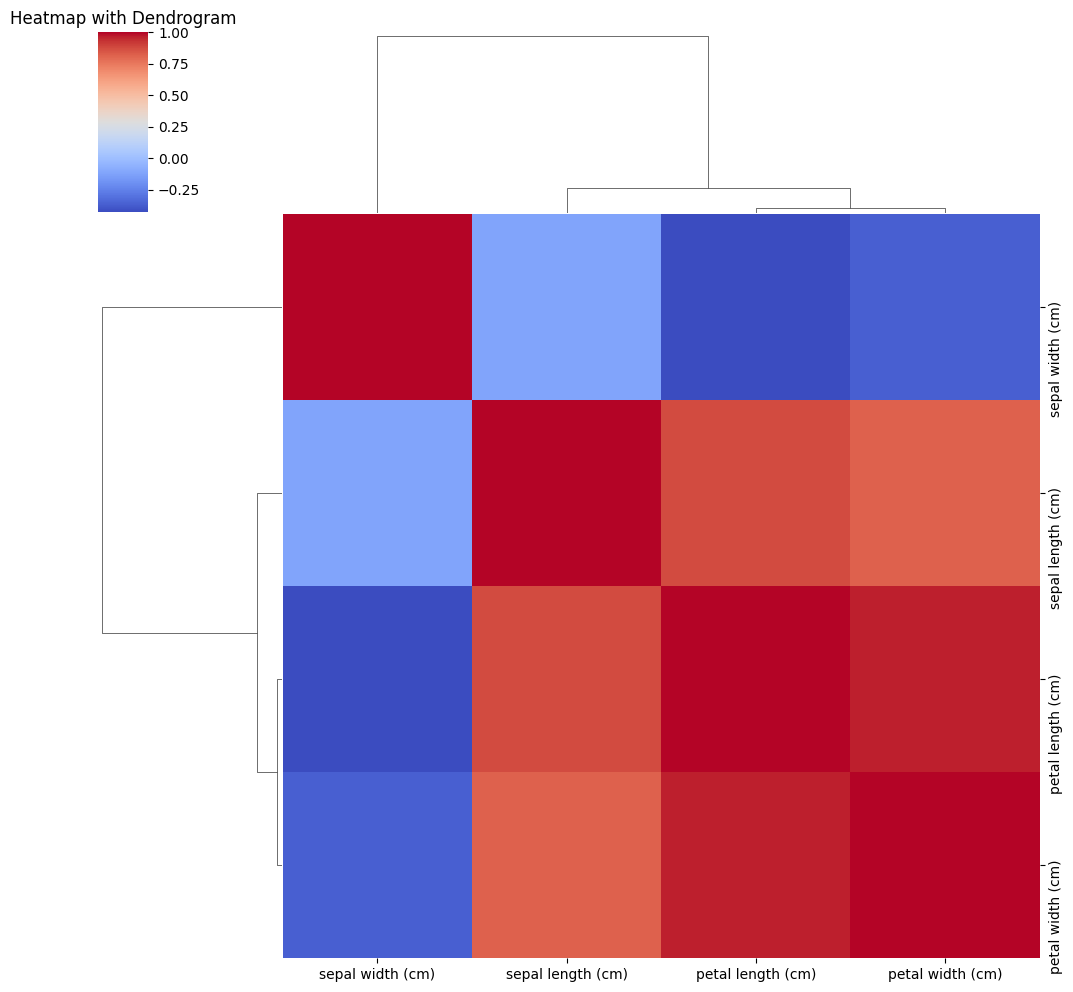

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram


class CorrelationVisualization:
    def __init__(self, data: pd.DataFrame):
        """
        初始化类，传入数据。
        :param data: 数据集，Pandas DataFrame 格式
        """
        self.data = data
        self.corr_matrix = self.data.corr()

    def pie_correlation_matrix(self):
        """
        绘制饼状相关性矩阵
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        for i in range(self.corr_matrix.shape[0]):
            for j in range(i + 1, self.corr_matrix.shape[1]):
                value = self.corr_matrix.iloc[i, j]
                ax.pie(
                    [abs(value), 1 - abs(value)],
                    radius=0.4,
                    center=(j, i),
                    colors=["yellowgreen", "gray"],
                )
        ax.set_xlim(-1, self.corr_matrix.shape[1])
        ax.set_ylim(-1, self.corr_matrix.shape[0])
        ax.set_xticks(range(self.corr_matrix.shape[1]))
        ax.set_xticklabels(self.corr_matrix.columns, rotation=90)
        ax.set_yticks(range(self.corr_matrix.shape[0]))
        ax.set_yticklabels(self.corr_matrix.index)
        plt.title("Pie Chart Correlation Matrix")
        plt.show()

    def scatter_matrix(self):
        """
        绘制散点图矩阵
        """
        sns.pairplot(self.data, kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.6}})
        plt.suptitle("Scatter Plot Matrix", y=1.02)
        plt.show()

    def bubble_correlation_matrix(self):
        """
        绘制气泡相关性矩阵
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        for i in range(self.corr_matrix.shape[0]):
            for j in range(self.corr_matrix.shape[1]):
                size = abs(self.corr_matrix.iloc[i, j]) * 300
                color = plt.cm.viridis(self.corr_matrix.iloc[i, j] * 0.5 + 0.5)
                ax.scatter(j, i, s=size, c=[color], alpha=0.7)
        ax.set_xticks(range(self.corr_matrix.shape[1]))
        ax.set_xticklabels(self.corr_matrix.columns, rotation=90)
        ax.set_yticks(range(self.corr_matrix.shape[0]))
        ax.set_yticklabels(self.corr_matrix.index)
        plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax)
        plt.title("Bubble Correlation Matrix")
        plt.show()

    def heatmap_with_dendrogram(self):
        """
        绘制带有层次聚类树的热图
        """
        sns.clustermap(self.corr_matrix, method="ward", cmap="coolwarm", figsize=(10, 10))
        plt.title("Heatmap with Dendrogram")
        plt.show()


# 使用示例
from sklearn.datasets import load_iris

# 加载基础机器学习数据集
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# 实例化绘图类
viz = CorrelationVisualization(data)

# 调用绘图方法
viz.pie_correlation_matrix()
viz.scatter_matrix()
viz.bubble_correlation_matrix()
viz.heatmap_with_dendrogram()


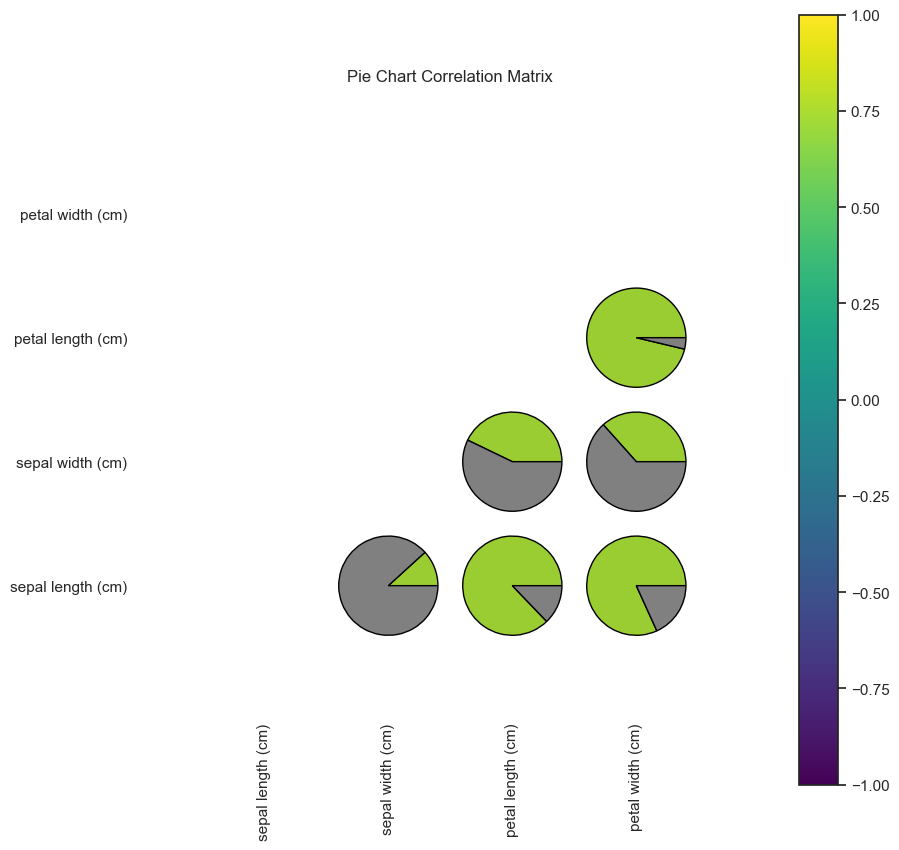

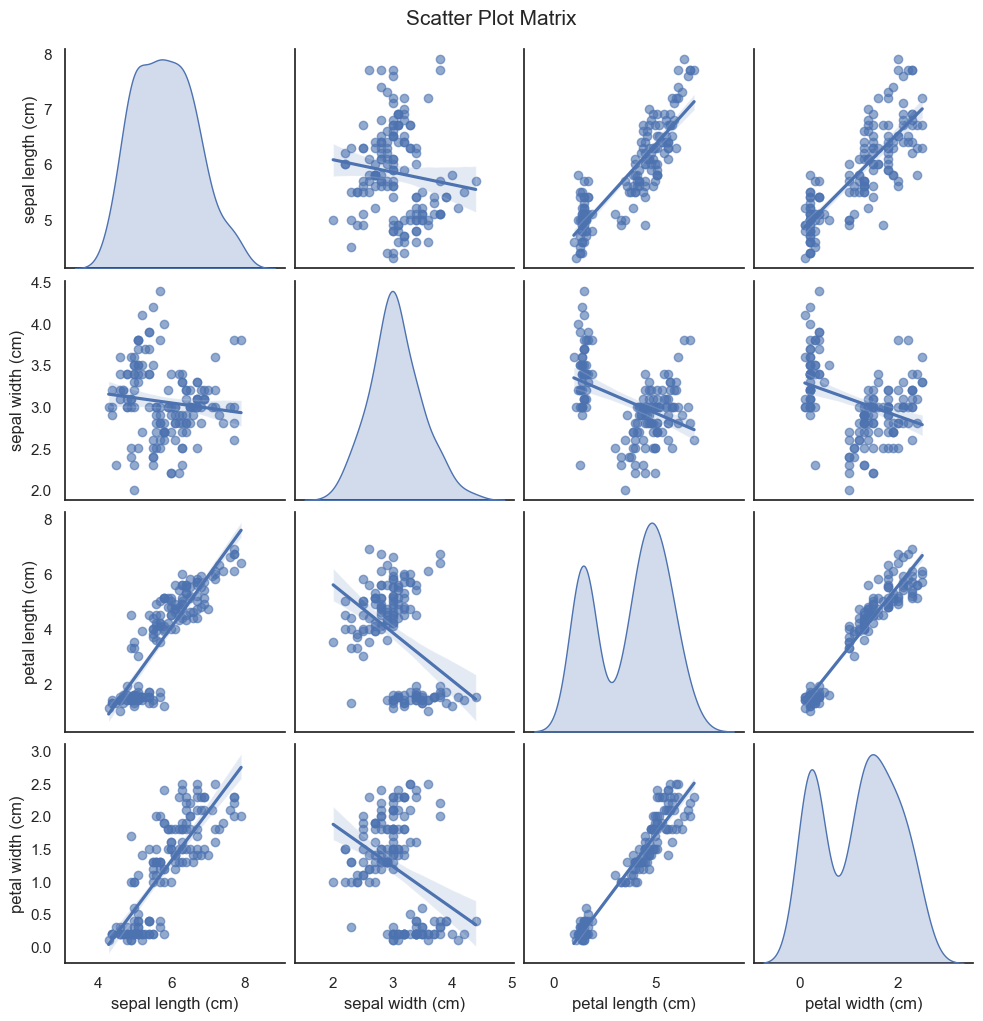

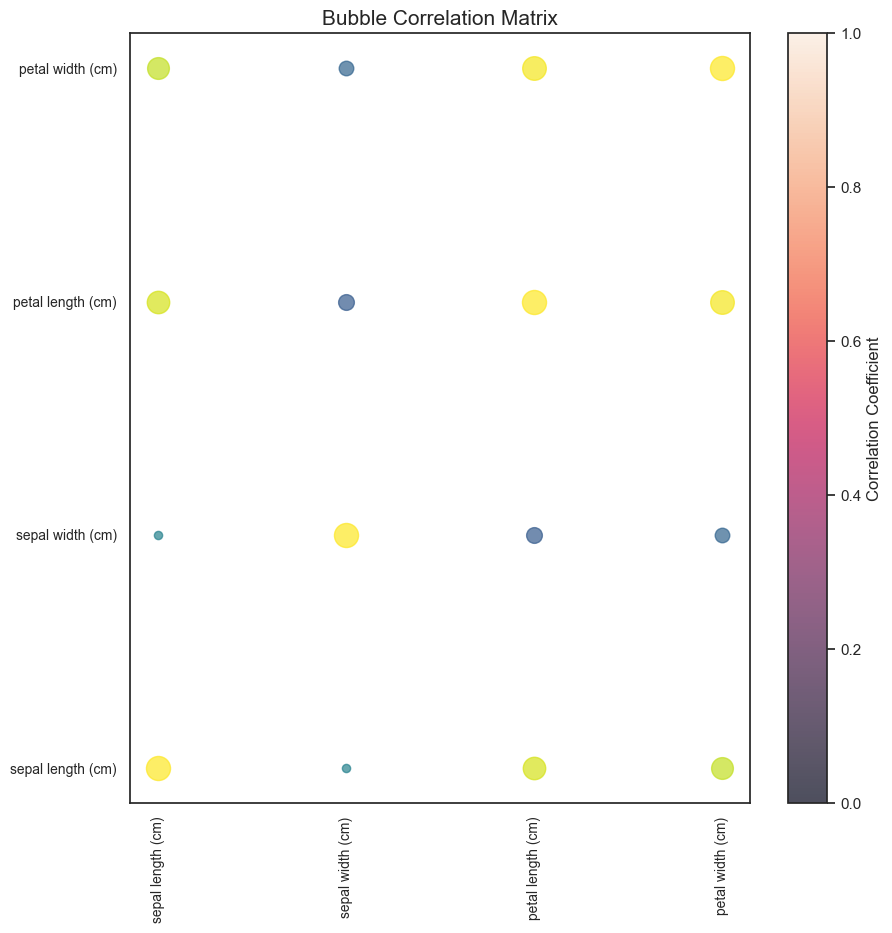

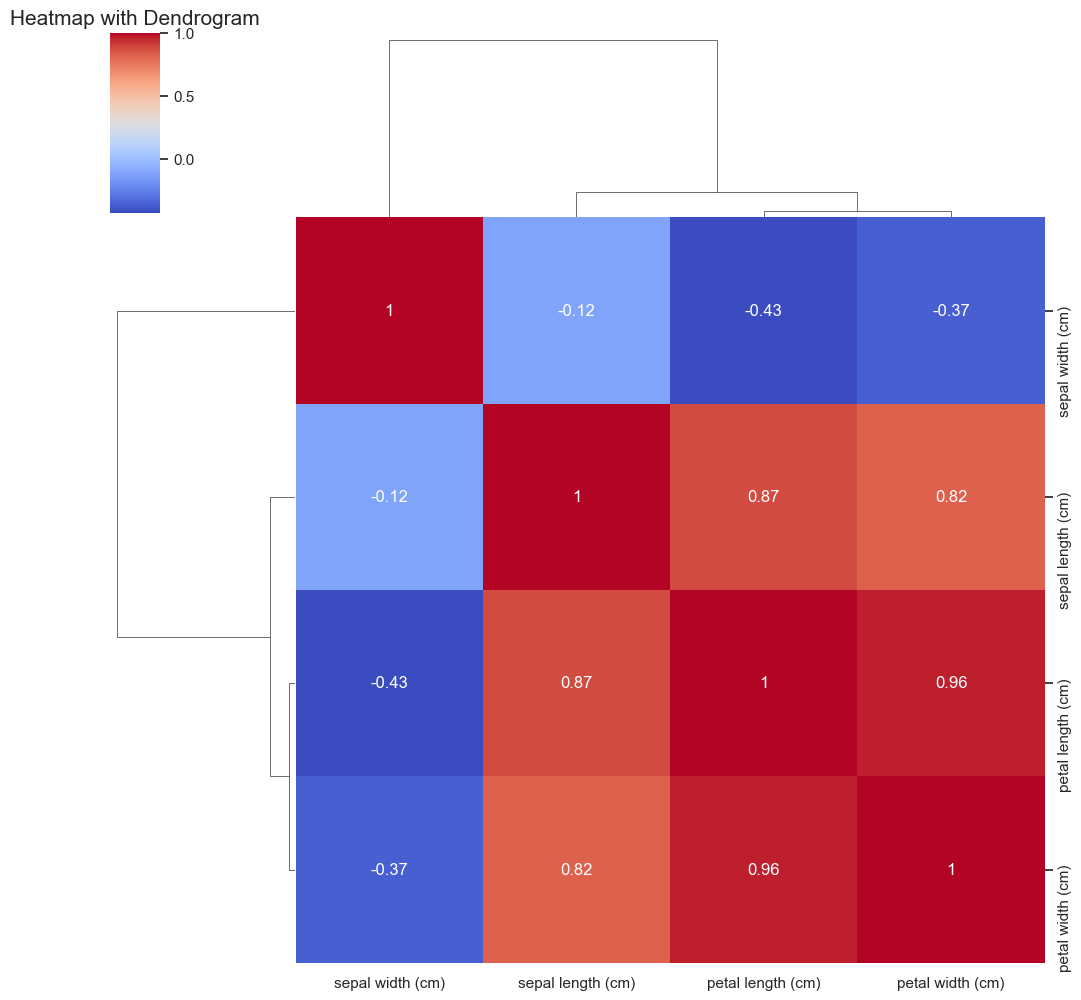

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

class CorrelationVisualization:
    def __init__(self, data: pd.DataFrame):
        """
        Initializes the class with a dataset and computes the correlation matrix.
        :param data: Dataset in Pandas DataFrame format.
        """
        self.data = data
        self.corr_matrix = self.data.corr()

    def pie_correlation_matrix(self, display_numbers=False):
        """
        Draws a pie chart correlation matrix with optional numerical annotations.
        :param display_numbers: Boolean to control display of correlation coefficients.
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        norm = Normalize(vmin=-1, vmax=1)
        cmap = plt.cm.viridis  # or any other colormap
        sm = ScalarMappable(norm=norm, cmap=cmap)

        for i in range(self.corr_matrix.shape[0]):
            for j in range(i + 1, self.corr_matrix.shape[1]):
                value = self.corr_matrix.iloc[i, j]
                ax.pie(
                    [abs(value), 1 - abs(value)],
                    radius=0.4,
                    center=(j, i),
                    colors=["yellowgreen", "gray"],
                    wedgeprops={'edgecolor': 'black'}
                )
                if display_numbers:
                    color = sm.to_rgba(value)
                    # Ensure text color contrasts with pie (use black or white depending on brightness)
                    text_color = 'white' if abs(value) > 0.5 else 'black'
                    ax.text(j, i, f'{value:.2f}', color=text_color, ha='center', va='center', fontsize=8)

        ax.set_xlim(-1, self.corr_matrix.shape[1])
        ax.set_ylim(-1, self.corr_matrix.shape[0])
        ax.set_xticks(range(self.corr_matrix.shape[1]))
        ax.set_xticklabels(self.corr_matrix.columns, rotation=90)
        ax.set_yticks(range(self.corr_matrix.shape[0]))
        ax.set_yticklabels(self.corr_matrix.index)
        plt.colorbar(sm, ax=ax)
        plt.title("Pie Chart Correlation Matrix")
        plt.show()

    def scatter_matrix(self):
        """
        Draws a scatter plot matrix.
        """
        sns.pairplot(self.data, kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.6}})
        plt.suptitle("Scatter Plot Matrix", y=1.02, fontsize=15)
        plt.show()

    def bubble_correlation_matrix(self):
        """
        Draws a bubble correlation matrix.
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        scatter = None

        # Plot bubbles
        for i in range(self.corr_matrix.shape[0]):
            for j in range(self.corr_matrix.shape[1]):
                size = abs(self.corr_matrix.iloc[i, j]) * 300  # Scale size of bubbles
                color = plt.cm.viridis(self.corr_matrix.iloc[i, j] * 0.5 + 0.5)
                scatter = ax.scatter(j, i, s=size, c=[color], alpha=0.7)

        ax.set_xticks(range(self.corr_matrix.shape[1]))
        ax.set_xticklabels(self.corr_matrix.columns, rotation=90, fontsize=10)
        ax.set_yticks(range(self.corr_matrix.shape[0]))
        ax.set_yticklabels(self.corr_matrix.index, fontsize=10)
        
        # Colorbar
        plt.colorbar(scatter, ax=ax, orientation='vertical', label="Correlation Coefficient")
        plt.title("Bubble Correlation Matrix", fontsize=15)
        plt.show()

    def heatmap_with_dendrogram(self):
        """
        Draws a heatmap with hierarchical clustering dendrogram.
        """
        sns.clustermap(self.corr_matrix, method="ward", cmap="coolwarm", figsize=(10, 10), annot=True)
        plt.title("Heatmap with Dendrogram", fontsize=15)
        plt.show()


# Load dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Instantiate the CorrelationVisualization class
viz = CorrelationVisualization(data)

# Call plotting methods
viz.pie_correlation_matrix()
viz.scatter_matrix()
viz.bubble_correlation_matrix()
viz.heatmap_with_dendrogram()


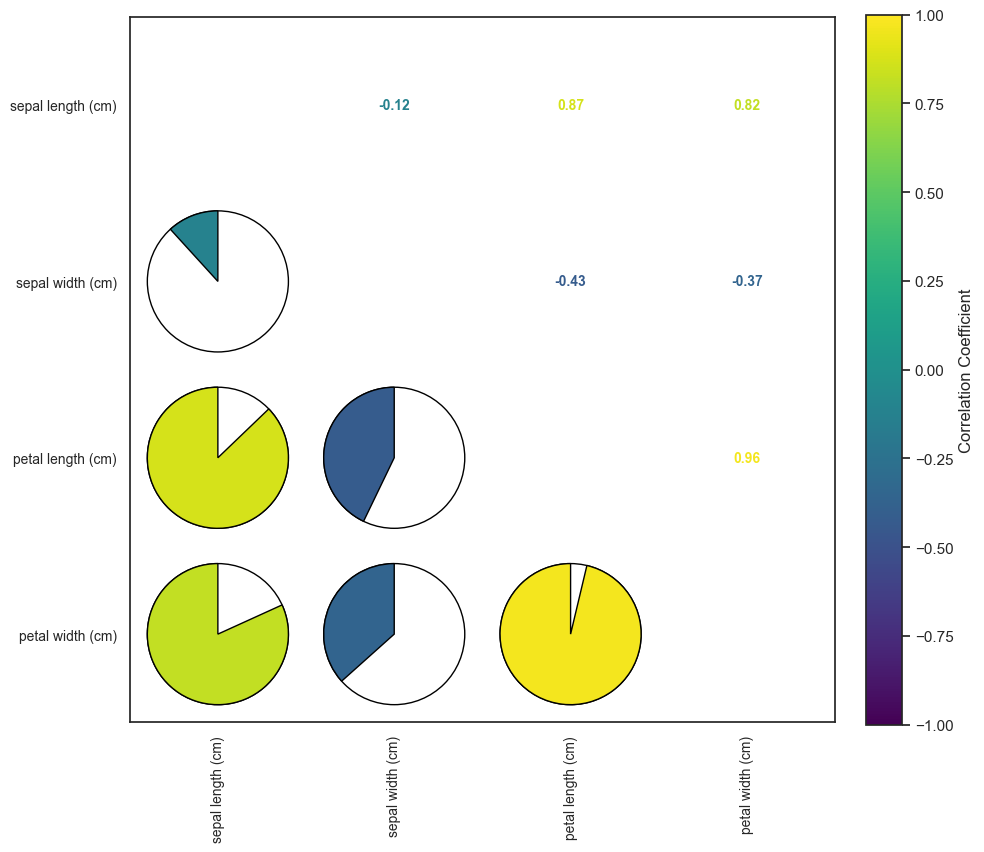

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib.patches import Wedge, Circle

# 加载鸢尾花数据集
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# 计算相关系数矩阵
corr = data.corr()

# 创建画布
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.cm.viridis  # 定义颜色映射

# 绘制下三角饼图和上三角相关系数数值
for i in range(len(corr)):
    for j in range(len(corr)):
        x, y = j, len(corr) - i - 1  # 修正坐标
        if i > j:  # 下三角部分绘制饼图
            value = corr.iloc[i, j]
            full_circle = Circle((x, y), 0.4, edgecolor='black', facecolor='white', lw=1)  # 完整圆圈
            wedge = Wedge((x, y), 0.4, 90, 90 + 360 * abs(value), 
                          facecolor=cmap((value + 1) / 2), edgecolor='black', lw=1)  # 占用部分
            ax.add_patch(full_circle)
            ax.add_patch(wedge)
        elif i < j:  # 上三角部分绘制数值
            value = corr.iloc[i, j]
            color = cmap((value + 1) / 2)
            ax.text(
                x, y, f"{value:.2f}",
                ha="center", va="center",
                fontsize=10,  # 字体大小调节到合适范围
                color=color,  # 数值颜色和colorbar一致
                fontweight="bold"
            )

# 设置colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Correlation Coefficient", fontsize=12)

# 调整坐标轴和布局
ax.set_xticks(range(len(corr)))
ax.set_xticklabels(data.columns, rotation=90, fontsize=10)
ax.set_yticks(range(len(corr)))
ax.set_yticklabels(data.columns[::-1], fontsize=10)
ax.set_xlim(-0.5, len(corr) - 0.5)
ax.set_ylim(-0.5, len(corr) - 0.5)
ax.set_aspect("equal")

# 对角线不显示任何内容
for i in range(len(corr)):
    ax.text(i, len(corr) - i - 1, "", ha="center", va="center")

plt.tight_layout()

# 显示图形
plt.show()


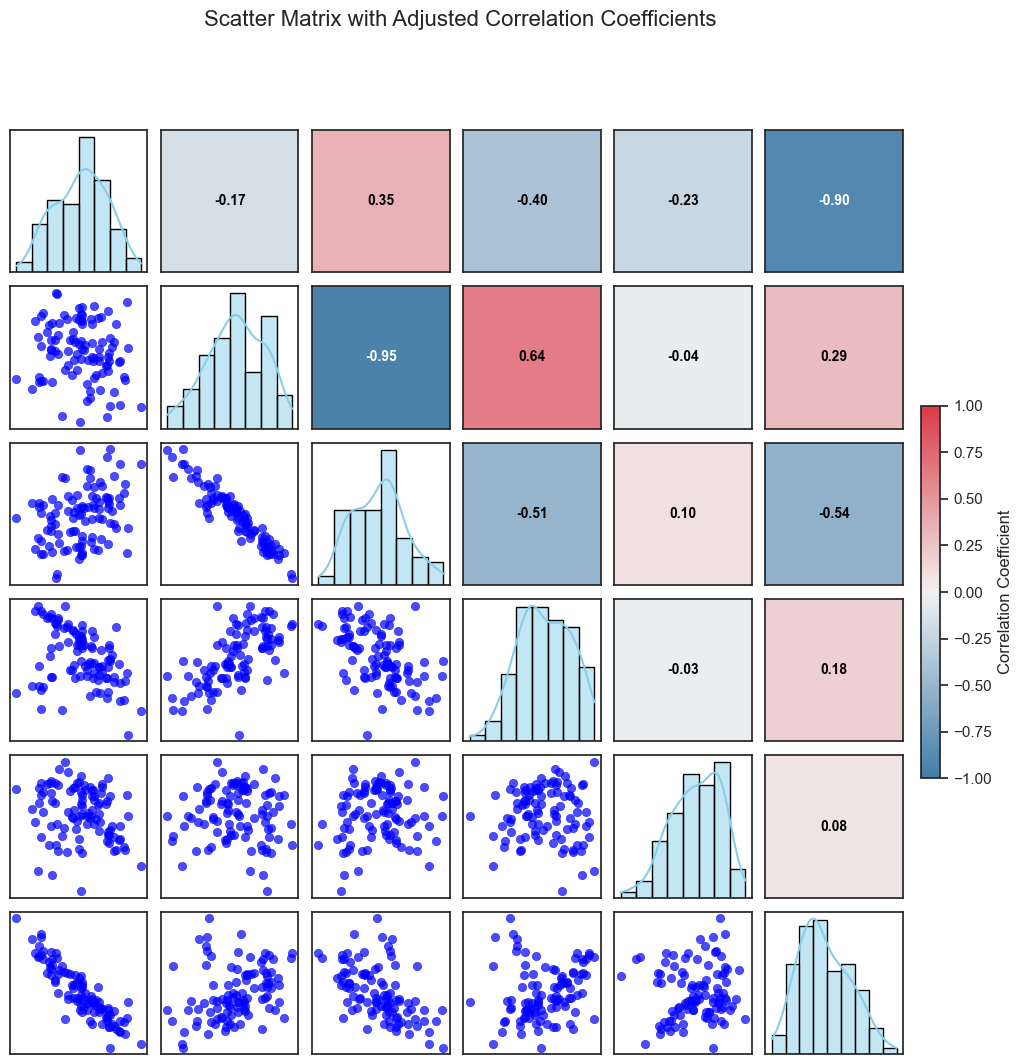

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# 生成示例数据
data, _ = make_classification(n_samples=100, n_features=6, n_informative=4, n_redundant=2, random_state=42)

# 转为 DataFrame
df = pd.DataFrame(data, columns=[f"Var{i+1}" for i in range(6)])

# 计算相关系数矩阵
corr = df.corr()

# 创建画布
fig, axes = plt.subplots(len(corr), len(corr), figsize=(12, 12))
cmap = sns.diverging_palette(240, 10, as_cmap=True)  # 蓝到白到红的渐变配色

# 绘制图像
for i in range(len(corr)):
    for j in range(len(corr)):
        ax = axes[i, j]
        if i == j:
            # 对角线上绘制直方图和密度曲线
            sns.histplot(df.iloc[:, i], kde=True, ax=ax, color="skyblue", edgecolor="black")
            ax.set_ylabel("")
            ax.set_xlabel("")
        elif i > j:
            # 下三角绘制散点图
            sns.scatterplot(x=df.iloc[:, j], y=df.iloc[:, i], ax=ax, alpha=0.7, edgecolor=None, color="blue")
            ax.set_ylabel("")
            ax.set_xlabel("")
        else:
            # 上三角绘制相关系数
            value = corr.iloc[i, j]
            color = cmap((value + 1) / 2)  # 映射到0-1
            ax.set_facecolor(color)  # 背景色
            ax.text(
                0.5, 0.5, f"{value:.2f}", color="black" if abs(value) < 0.7 else "white",
                ha="center", va="center", fontsize=10, fontweight="bold", transform=ax.transAxes
            )
        # 隐藏不必要的刻度
        ax.set_xticks([])
        ax.set_yticks([])

# 调整布局
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# 添加 colorbar
norm = plt.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, location="right", fraction=0.02, pad=0.02)
cbar.set_label("Correlation Coefficient", fontsize=12)

# 设置整体标题
fig.suptitle("Scatter Matrix with Adjusted Correlation Coefficients", fontsize=16)
plt.show()


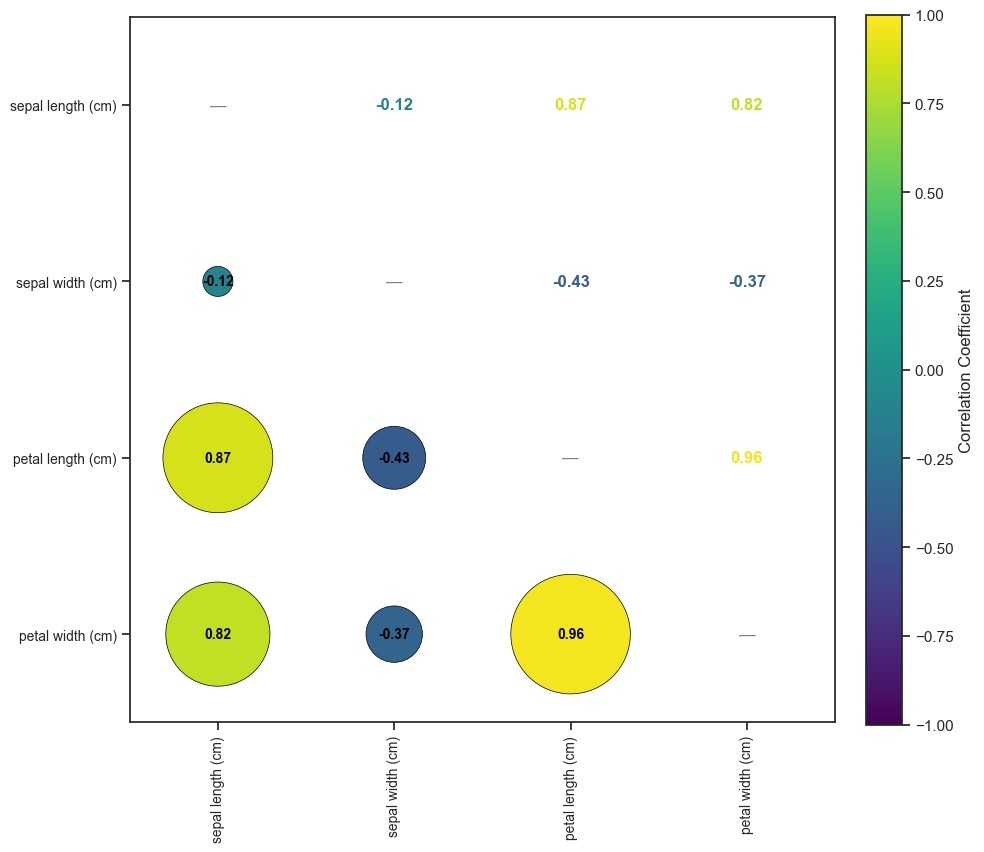

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib.patches import Circle

# 加载鸢尾花数据集
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# 计算相关系数矩阵
corr = data.corr()

# 参数控制是否在圆内部显示数字
show_numbers_in_circles = True

# 创建画布
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.cm.viridis  # 定义颜色映射

# 绘制下三角圆形和上三角相关系数数值
for i in range(len(corr)):
    for j in range(len(corr)):
        x, y = j, len(corr) - i - 1  # 修正坐标
        if i > j:  # 下三角部分绘制圆形
            value = corr.iloc[i, j]
            color = cmap((value + 1) / 2)  # 映射到0-1范围内
            radius = 0.3 * abs(value) + 0.05  # 调整圆的大小，避免过小
            circle = Circle((x, y), radius=radius, facecolor=color, edgecolor="black", lw=0.5)
            ax.add_patch(circle)
            if show_numbers_in_circles:  # 如果设置为显示数字
                ax.text(
                    x, y, f"{value:.2f}",
                    ha="center", va="center",
                    fontsize=10, color="black", fontweight="bold"
                )
        elif i < j:  # 上三角部分绘制数值
            value = corr.iloc[i, j]
            color = cmap((value + 1) / 2)
            ax.text(
                x, y, f"{value:.2f}",
                ha="center", va="center",
                fontsize=12,  # 增大字体大小
                color=color,  # 数值颜色和数值对应
                fontweight="bold"
            )
        else:  # 对角线部分显示短横线
            ax.text(
                x, y, "—",
                ha="center", va="center",
                fontsize=12,  # 对角线显示符号
                color="gray"
            )

# 设置colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Correlation Coefficient", fontsize=12)

# 调整坐标轴和布局
ax.set_xticks(range(len(corr)))
ax.set_xticklabels(data.columns, rotation=90, fontsize=10)  # 显示 X 轴标签
ax.set_yticks(range(len(corr)))
ax.set_yticklabels(data.columns[::-1], fontsize=10)  # 显示 Y 轴标签
ax.set_xlim(-0.5, len(corr) - 0.5)
ax.set_ylim(-0.5, len(corr) - 0.5)
ax.set_aspect("equal")

# 显示刻度线和边框
ax.tick_params(left=True, bottom=True)
ax.spines[:].set_visible(True)

plt.tight_layout()

# 显示图形
plt.show()


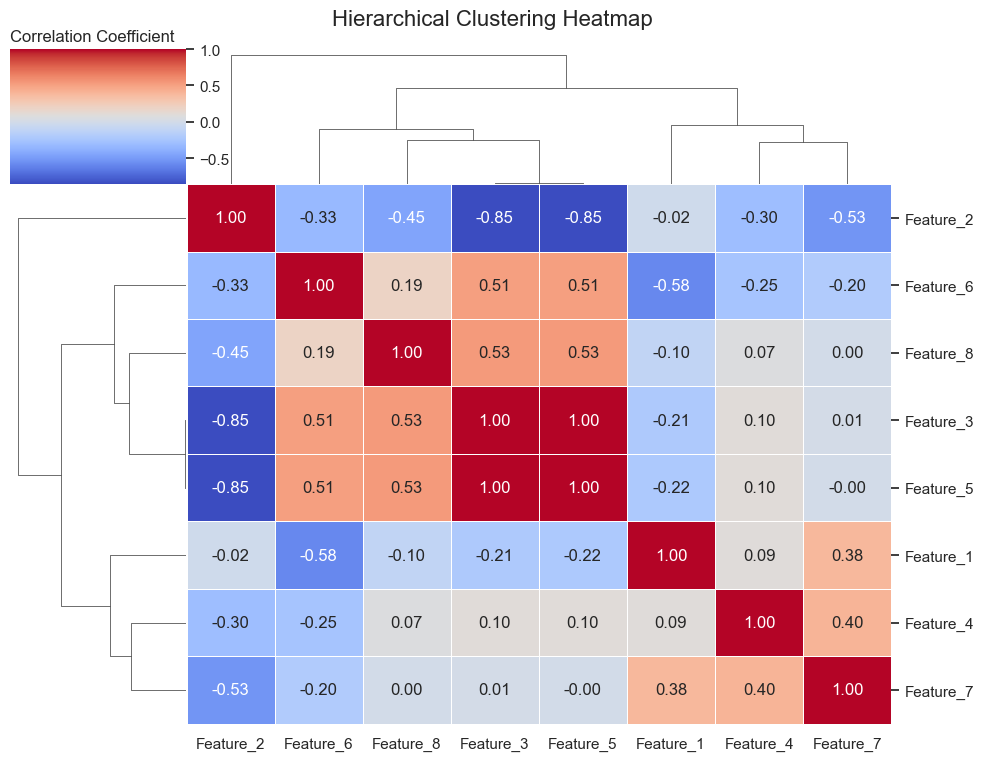

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# 生成示例数据
data, _ = make_classification(n_samples=10, n_features=8, random_state=42)
df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])

# 计算相关系数矩阵
corr = df.corr()

# 创建层次聚类热图
g = sns.clustermap(
    corr, 
    annot=True,        # 在热图上显示数值
    fmt=".2f",         # 数值格式为小数点后两位
    cmap="coolwarm",   # 颜色映射，蓝色到红色
    linewidths=0.5,    # 单元格间隔
    figsize=(10, 8),   # 图形大小
    cbar_pos=(0.02, 0.8, 0.02, 0.15),  # 自定义 colorbar 位置（左上角，变苗条）
    dendrogram_ratio=(0.2, 0.2),       # 调整聚类树比例
    col_cluster=True,  # 对列进行聚类
    row_cluster=True   # 对行进行聚类
)

# 设置标题
plt.subplots_adjust(top=0.9)  # 调整图形顶部的空间
g.fig.suptitle("Hierarchical Clustering Heatmap", fontsize=16, y=0.95)  # 调整标题位置

# 调整 colorbar 标签大小
g.cax.set_title("Correlation Coefficient", loc="left", fontsize=12)

# 显示图形
plt.show()


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Circle, Wedge

class CorrelationVisualizer:
    def __init__(self, data: pd.DataFrame):
        """
        初始化类
        :param data: 输入的 Pandas DataFrame 数据
        """
        self.data = data
        self.corr = self.data.corr()  # 计算相关系数矩阵

    def pie_and_numbers(self, show_numbers=True):
        """
        下三角饼图，上三角显示数字
        :param show_numbers: 是否显示上三角的数字
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        cmap = plt.cm.viridis  # 定义颜色映射

        for i in range(len(self.corr)):
            for j in range(len(self.corr)):
                x, y = j, len(self.corr) - i - 1  # 修正坐标
                if i > j:  # 下三角部分绘制饼图
                    value = self.corr.iloc[i, j]
                    full_circle = Circle((x, y), 0.4, edgecolor='black', facecolor='white', lw=1)
                    wedge = Wedge((x, y), 0.4, 90, 90 + 360 * abs(value), 
                                  facecolor=cmap((value + 1) / 2), edgecolor='black', lw=1)
                    ax.add_patch(full_circle)
                    ax.add_patch(wedge)
                elif i < j and show_numbers:  # 上三角部分绘制数值
                    value = self.corr.iloc[i, j]
                    color = cmap((value + 1) / 2)
                    ax.text(
                        x, y, f"{value:.2f}",
                        ha="center", va="center",
                        fontsize=10,
                        color=color,
                        fontweight="bold"
                    )
        # 设置 colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
        cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label("Correlation Coefficient", fontsize=12)

        # 调整坐标轴和布局
        ax.set_xticks(range(len(self.corr)))
        ax.set_xticklabels(self.data.columns, rotation=90, fontsize=10)
        ax.set_yticks(range(len(self.corr)))
        ax.set_yticklabels(self.data.columns[::-1], fontsize=10)
        ax.set_xlim(-0.5, len(self.corr) - 0.5)
        ax.set_ylim(-0.5, len(self.corr) - 0.5)
        ax.set_aspect("equal")
        plt.tight_layout()
        plt.show()

    def scatter_and_correlation(self, show_numbers=True):
        # 生成示例数据
       

        # 转为 DataFrame
        df = pd.DataFrame(self.data, columns=self.data.columns)

        # 计算相关系数矩阵
        corr = df.corr()

        # 创建画布
        fig, axes = plt.subplots(len(corr), len(corr), figsize=(12, 12))
        cmap = sns.diverging_palette(240, 10, as_cmap=True)  # 蓝到白到红的渐变配色

        # 绘制图像
        for i in range(len(corr)):
            for j in range(len(corr)):
                ax = axes[i, j]
                if i == j:
                    # 对角线上绘制直方图和密度曲线
                    sns.histplot(df.iloc[:, i], kde=True, ax=ax, color="skyblue", edgecolor="black")
                    ax.set_ylabel("")
                    ax.set_xlabel("")
                elif i > j:
                    # 下三角绘制散点图
                    sns.scatterplot(x=df.iloc[:, j], y=df.iloc[:, i], ax=ax, alpha=0.7, edgecolor=None, color="blue")
                    ax.set_ylabel("")
                    ax.set_xlabel("")
                else:
                    # 上三角绘制相关系数
                    value = corr.iloc[i, j]
                    color = cmap((value + 1) / 2)  # 映射到0-1
                    ax.set_facecolor(color)  # 背景色
                    ax.text(
                        0.5, 0.5, f"{value:.2f}", color="black" if abs(value) < 0.7 else "white",
                        ha="center", va="center", fontsize=10, fontweight="bold", transform=ax.transAxes
                    )
                # 隐藏不必要的刻度
                ax.set_xticks([])
                ax.set_yticks([])

        # 调整布局
        plt.subplots_adjust(hspace=0.1, wspace=0.1)

        # 添加 colorbar
        norm = plt.Normalize(vmin=-1, vmax=1)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=axes, location="right", fraction=0.02, pad=0.02)
        cbar.set_label("Correlation Coefficient", fontsize=12)

        # 设置整体标题
        fig.suptitle("Scatter Matrix with Adjusted Correlation Coefficients", fontsize=16)
        plt.show()

    def circle_and_numbers(self, show_numbers=True):
                

        data = pd.DataFrame(self.data, columns=self.data.columns)

        # 计算相关系数矩阵
        corr = data.corr()

        # 参数控制是否在圆内部显示数字
        show_numbers_in_circles = True

        # 创建画布
        fig, ax = plt.subplots(figsize=(10, 10))
        cmap = plt.cm.viridis  # 定义颜色映射

        # 绘制下三角圆形和上三角相关系数数值
        for i in range(len(corr)):
            for j in range(len(corr)):
                x, y = j, len(corr) - i - 1  # 修正坐标
                if i > j:  # 下三角部分绘制圆形
                    value = corr.iloc[i, j]
                    color = cmap((value + 1) / 2)  # 映射到0-1范围内
                    radius = 0.3 * abs(value) + 0.05  # 调整圆的大小，避免过小
                    circle = Circle((x, y), radius=radius, facecolor=color, edgecolor="black", lw=0.5)
                    ax.add_patch(circle)
                    if show_numbers_in_circles:  # 如果设置为显示数字
                        ax.text(
                            x, y, f"{value:.2f}",
                            ha="center", va="center",
                            fontsize=10, color="black", fontweight="bold"
                        )
                elif i < j:  # 上三角部分绘制数值
                    value = corr.iloc[i, j]
                    color = cmap((value + 1) / 2)
                    ax.text(
                        x, y, f"{value:.2f}",
                        ha="center", va="center",
                        fontsize=12,  # 增大字体大小
                        color=color,  # 数值颜色和数值对应
                        fontweight="bold"
                    )
                else:  # 对角线部分显示短横线
                    ax.text(
                        x, y, "—",
                        ha="center", va="center",
                        fontsize=12,  # 对角线显示符号
                        color="gray"
                    )

        # 设置colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
        cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label("Correlation Coefficient", fontsize=12)

        # 调整坐标轴和布局
        ax.set_xticks(range(len(corr)))
        ax.set_xticklabels(data.columns, rotation=90, fontsize=10)  # 显示 X 轴标签
        ax.set_yticks(range(len(corr)))
        ax.set_yticklabels(data.columns[::-1], fontsize=10)  # 显示 Y 轴标签
        ax.set_xlim(-0.5, len(corr) - 0.5)
        ax.set_ylim(-0.5, len(corr) - 0.5)
        ax.set_aspect("equal")

        # 显示刻度线和边框
        ax.tick_params(left=True, bottom=True)
        ax.spines[:].set_visible(True)

        plt.tight_layout()

        # 显示图形
        plt.show()

    def hierarchical_clustering(self):
        """
        层次聚类热图
        """
        # 生成示例数据
       
        df = pd.DataFrame(self.data, columns=self.data.columns)

        # 计算相关系数矩阵
        corr = df.corr()

        # 创建层次聚类热图
        g = sns.clustermap(
            corr, 
            annot=True,        # 在热图上显示数值
            fmt=".2f",         # 数值格式为小数点后两位
            cmap="coolwarm",   # 颜色映射，蓝色到红色
            linewidths=0.5,    # 单元格间隔
            figsize=(10, 8),   # 图形大小
            cbar_pos=(0.02, 0.8, 0.02, 0.15),  # 自定义 colorbar 位置（左上角，变苗条）
            dendrogram_ratio=(0.2, 0.2),       # 调整聚类树比例
            col_cluster=True,  # 对列进行聚类
            row_cluster=True   # 对行进行聚类
        )

        # 设置标题
        plt.subplots_adjust(top=0.9)  # 调整图形顶部的空间
        g.fig.suptitle("Hierarchical Clustering Heatmap", fontsize=16, y=0.95)  # 调整标题位置

        # 调整 colorbar 标签大小
        g.cax.set_title("Correlation Coefficient", loc="left", fontsize=12)

        # 显示图形
        plt.show()


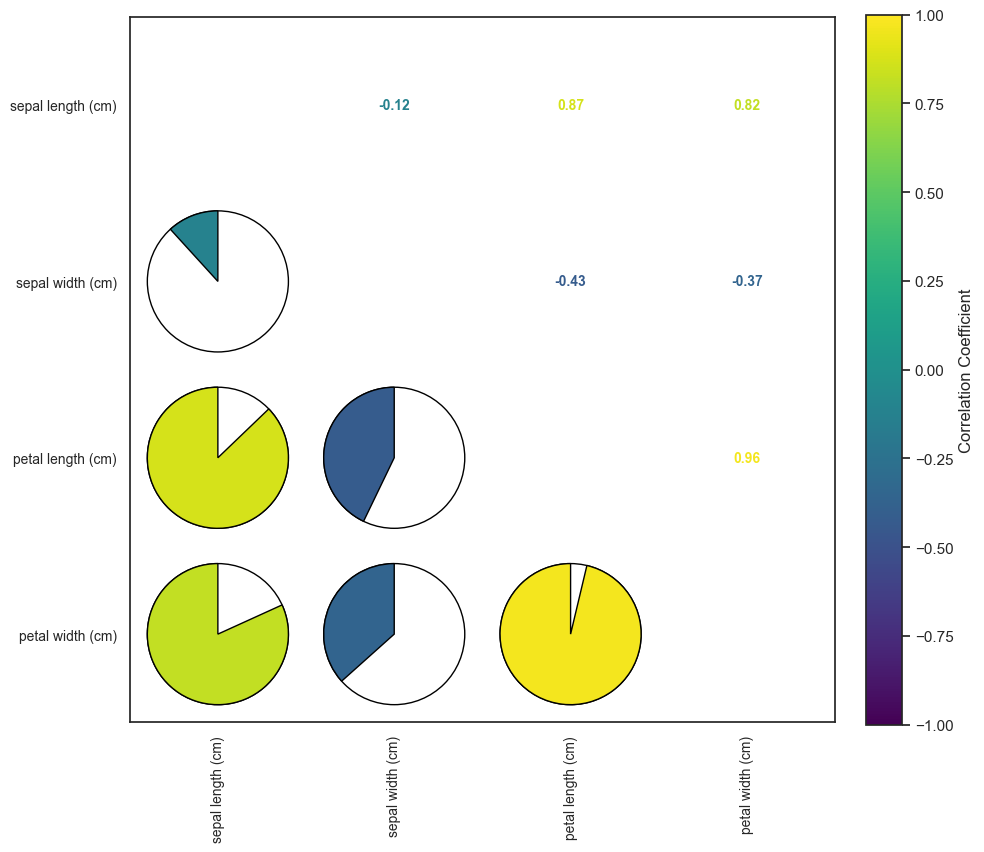

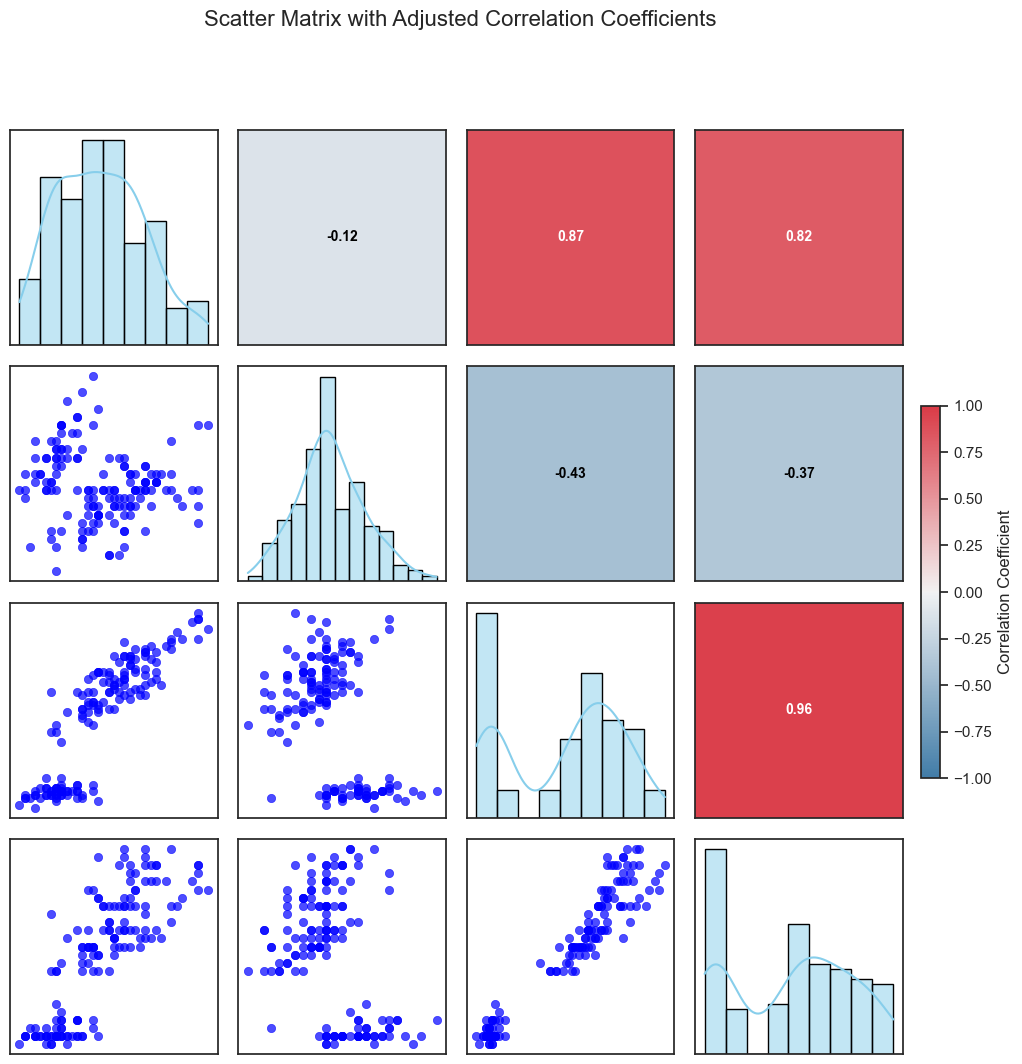

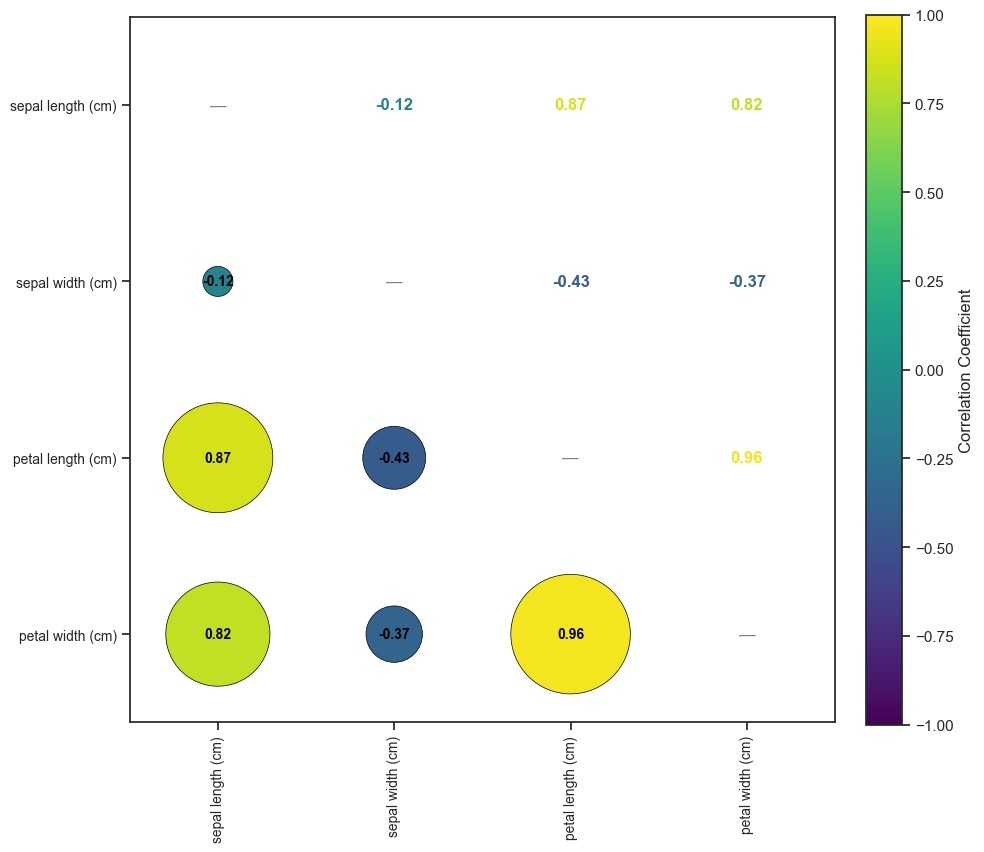

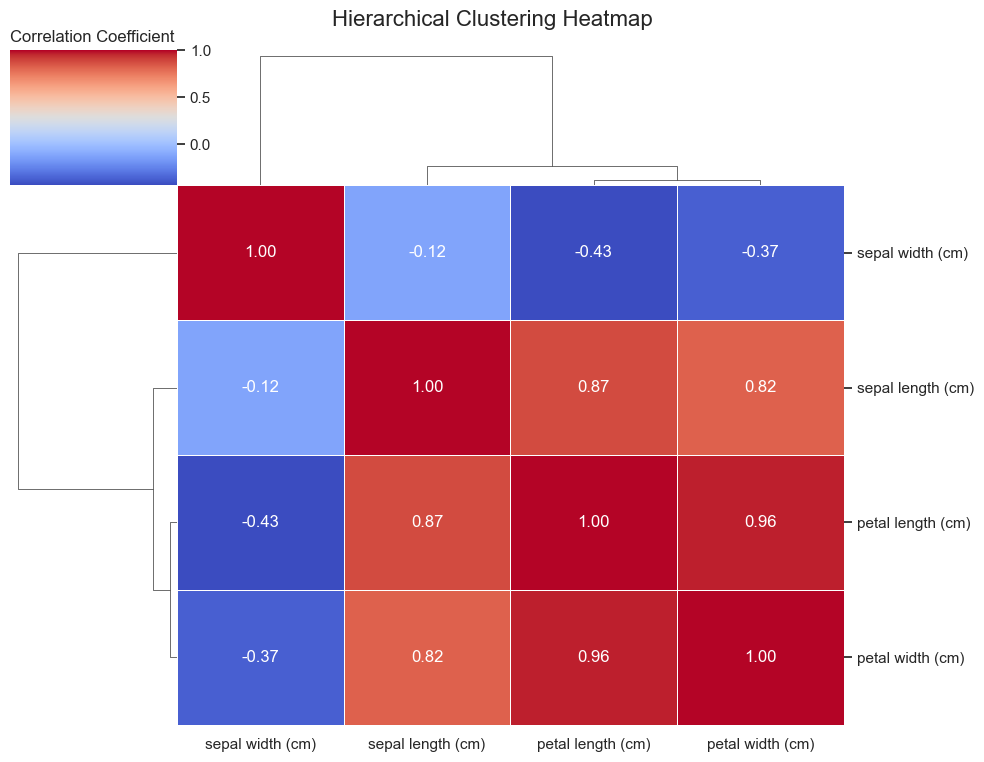

In [54]:
# 加载示例数据
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# 实例化类
visualizer = CorrelationVisualizer(data)

# 调用方法可视化
visualizer.pie_and_numbers(show_numbers=True)
visualizer.scatter_and_correlation(show_numbers=True)
visualizer.circle_and_numbers(show_numbers=True)
visualizer.hierarchical_clustering()
